In [1]:
import os

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Change current working dir
print("Original working dir: ", os.getcwd())
os.chdir("C:/Users/Nikola Vukobrat/Documents/GitHub/us-mutial-funds-and-etfs-analysis")
print("New working dir: ", os.getcwd())

Original working dir:  C:\Users\Nikola Vukobrat\Documents
New working dir:  C:\Users\Nikola Vukobrat\Documents\GitHub\us-mutial-funds-and-etfs-analysis


In [5]:
# Load dataset
df = pd.read_csv('dataset/ETFs.csv', index_col=False)

In [6]:
# Counts for each category
df['count'] = 1

for column in df.columns:
    if column == "count":
        continue
    print(df.groupby(column).count()['count'])
    print()

fund_name
1305    1
1306    1
1308    1
1309    1
1310    1
       ..
ZBIO    1
ZIV     1
ZMLP    1
ZROZ    1
ZSL     1
Name: count, Length: 2352, dtype: int64

fund_extended_name
AAM S&P 500 High Dividend Value ETF                 1
AAM S&P Emerging Markets High Dividend Value ETF    1
ABF Pan Asia Bond Index                             1
AGFiQ Hedged Dividend Income Fund                   1
AGFiQ U.S. Market Neutral Anti-Beta Fund            1
                                                   ..
iShares € Govt Bond 5-7yr ETF EUR Dist              1
iShares € Govt Bond 7-10yr ETF EUR Acc              1
iShares € Govt Bond 7-10yr ETF EUR Dist             1
iShares € Inflat Lnkd GovtBd ETF EUR Acc            1
iShares € Ultrashort Bond ETF EUR Dist              1
Name: count, Length: 2340, dtype: int64

category
Allocation - 15% to 30% Equity     5
Allocation - 30% to 50% Equity    10
Allocation - 50% to 70% Equity     8
Allocation - 70% to 85% Equity     4
Allocation - 85%+ Equity    

count            1832
unique             95
top       Large Blend
freq              114
Name: category, dtype: object


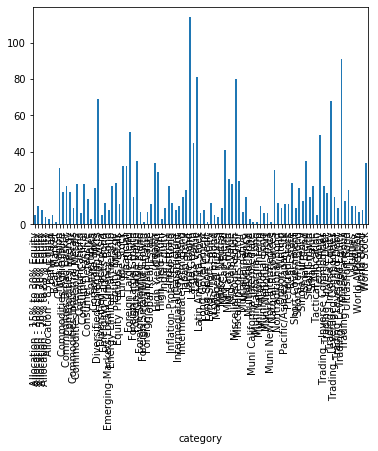

In [7]:
# Category distribution
print(df["category"].describe())
sub_df = df.groupby("category").count()['count']
sub_df.plot.bar()
plt.show()

TypeError: '<=' not supported between instances of 'float' and 'str'

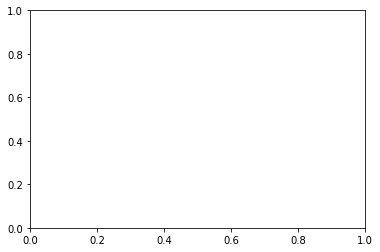

In [8]:
fig, ax = plt.subplots()
ax.hist(df['category'])
plt.show()